In [19]:
import numpy as np
from numba import jit,vectorize,float64, int64,types
import pdb
from numpy import matlib

In [21]:
def T_mat_template(kbar):
    # Kbar2 = 2^3 = 8
    kbar2 = 2**kbar
    A = np.zeros((kbar2,kbar2))
    for i in range(kbar2):
        for j in range(i,kbar2-i):
            A[i,j] = np.bitwise_xor(i,j)
    return(A)     

In [12]:
@jit(float64[:,:](float64[:,:],float64[:],int64))
def transition_mat_jit(A,inpt,kbar):
    b = inpt[0]
    gamma_kbar = inpt[2]
    gamma = np.zeros((kbar,1))
    gamma[0,0] = 1-(1-gamma_kbar)**(1/(b**(kbar-1)))
    for i in range(1,kbar):
        gamma[i,0] = 1-(1-gamma[0,0])**(b**(i))
    gamma = gamma*0.5
    gamma = np.c_[gamma,gamma]
    gamma[:,0] = 1 - gamma[:,1]
    kbar2 = 2**kbar
    prob = np.ones((kbar2,1))
    
    for i in range(kbar2):
        for m in range(kbar):
            prob[i,0] =prob[i,0] * gamma[kbar-m-1,
                np.unpackbits(np.array([i],dtype = np.uint8))[-(m+1)]]
    for i in range(2**(kbar-1)):
        for j in range(i,2**(kbar-1)):
            A[kbar2-i-1,j] = prob[np.rint(kbar2 - A[i,j]-1).astype(int),0]
            A[kbar2-j-1,i] = A[kbar2-i-1,j]
            A[j,kbar2-i-1] = A[kbar2-i-1,j]
            A[i,kbar2-j-1] = A[kbar2-i-1,j]
            A[i,j] = prob[np.rint(A[i,j]).astype(int),0]
            A[j,i] = A[i,j].copy()
            A[kbar2-j-1,kbar2-i-1] = A[i,j]
            A[kbar2-i-1,kbar2-j-1] = A[i,j]
        
    return(A)

In [31]:
def transition_mat(A,inpt,kbar):
    b = inpt[0]
    gamma_kbar = inpt[2]
    gamma = np.zeros((kbar,1))
    gamma[0,0] = 1-(1-gamma_kbar)**(1/(b**(kbar-1)))
    for i in range(1,kbar):
        gamma[i,0] = 1-(1-gamma[0,0])**(b**(i))
    gamma = gamma*0.5
    gamma = np.c_[gamma,gamma]
    gamma[:,0] = 1 - gamma[:,1]
    kbar2 = 2**kbar
    prob = np.ones((kbar2,1))
    
    for i in range(kbar2):
        for m in range(kbar):
            prob[i,0] =prob[i,0] * gamma[kbar-m-1,
                np.unpackbits(np.array([i],dtype = np.uint8))[-(m+1)]]
            
    for i in range(2**(kbar-1)):
        for j in range(i,2**(kbar-1)):
            A[kbar2-i-1,j] = prob[np.rint(kbar2 - A[i,j]-1).astype(int),0]
            A[kbar2-j-1,i] = A[kbar2-i-1,j]
            A[j,kbar2-i-1] = A[kbar2-i-1,j]
            A[i,kbar2-j-1] = A[kbar2-i-1,j]
            A[i,j] = prob[np.rint(A[i,j]).astype(int),0]
            A[j,i] = A[i,j].copy()
            A[kbar2-j-1,kbar2-i-1] = A[i,j]
            A[kbar2-i-1,kbar2-j-1] = A[i,j]
        
    return(A)

In [22]:
A = [T_mat_template(i) for i in range(2,9)]

In [75]:
%%timeit
transition_mat_jit(A[0],np.array([3,1.5,0.5,3]),2)

163 µs ± 6.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [76]:
%%timeit
transition_mat(A[0],np.array([3,1.5,0.5,3]),2)

80.5 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [77]:
%%timeit
transition_mat_jit(A[1],np.array([3,1.5,0.5,3]),3)

244 µs ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [78]:
%%timeit
transition_mat(A[1],[3,1.5,0.5,3],3)

171 µs ± 5.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [79]:
%%timeit
transition_mat_jit(A[2],np.array([3,1.5,0.5,3]),4)

537 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [80]:
%%timeit
transition_mat(A[2],np.array([3,1.5,0.5,3]),4)

455 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [81]:
%%timeit
transition_mat_jit(A[3],np.array([3,1.5,0.5,3]),5)

1.47 ms ± 24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [82]:
%%timeit
transition_mat(A[3],np.array([3,1.5,0.5,3]),5)

1.4 ms ± 58.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [83]:
%%timeit
transition_mat_jit(A[4],np.array([3,1.5,0.5,3]),6)

4.78 ms ± 91 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [84]:
%%timeit
transition_mat(A[4],np.array([3,1.5,0.5,3]),6)

4.79 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
%%timeit
transition_mat_jit(A[5],np.array([3,1.5,0.5,3]),7)

16.9 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
%%timeit
transition_mat(A[5],np.array([3,1.5,0.5,3]),7)

17.3 ms ± 361 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
%%timeit
transition_mat_jit(A[6],np.array([3,1.5,0.5,3]),8)

62.8 ms ± 825 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [88]:
%%timeit
transition_mat(A[6],np.array([3,1.5,0.5,3]),8)

63.7 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
@jit(float64(float64,int64,float64[:,:],float64[:,:],float64[:]))
#estim_flag= list
#input = double
def MSM_like_init(inpt,kbar,data,A_template,estim_flag):
    inpt = [estim_flag[0],inpt,estim_flag[1],estim_flag[2]]
    sigma = inpt[3]/np.sqrt(252)
    k2 = 2**kbar
    A = transition_mat(A_template.copy(),inpt,kbar)
    g_m = gofm(inpt,kbar)
    T = len(data)
    pi_mat = np.zeros((T+1,k2))
    LLs = np.zeros(T)
    pi_mat[0,:] = (1/k2)*np.ones((1,k2))
    """
    Likelihood Algorithm
    """
    pa = (2*np.pi)**(-0.5)
    s = sigma*g_m
    w_t = data 
    w_t = pa*np.exp(-0.5*((w_t/s)**2))/s
    w_t = w_t + 1e-16

    for t in range(T):
        
        piA = np.dot(pi_mat[t,:],A)
        C = (w_t[t,:]*piA)
        ft = np.sum(C) # log
        if np.isclose(ft,0):
            pi_mat[t+1,1]=1
        else:
            pi_mat[t+1,:] = C/ft
        LLs[t] = np.log(np.dot(w_t[t,:],piA))
        
    LL = -np.sum(LLs)
    if np.any(np.isinf(LLs)):
        print("Log-likelihood is inf. Probably due to all zeros in pi_mat.")
    return (LL)

In [5]:
@jit(types.Tuple((float64[:],float64[:,:]))(float64[:],int64,float64[:,:],float64[:,:]))
def MSM_likelihood(inpt,kbar,data,A_template):        
    sigma = inpt[3]/np.sqrt(252)
    k2 = 2**kbar
    A = transition_mat(A_template.copy(),inpt,kbar)
    g_m = gofm(inpt,kbar)
    T = len(data)
    pi_mat = np.zeros((T+1,k2))
    LLs = np.zeros(T)
    pi_mat[0,:] = (1/k2)*np.ones((1,k2))
    """
    Likelihood Algorithm
    """
    pa = (2*np.pi)**(-0.5)
    s = sigma*g_m
    w_t = data 
    w_t = pa*np.exp(-0.5*((w_t/s)**2))/s
    w_t = w_t + 1e-16

    for t in range(T):
        
        piA = np.dot(pi_mat[t,:],A)
        C = (w_t[t,:]*piA)
        ft = np.sum(C) # log
        if np.isclose(ft,0):
            pi_mat[t+1,1]=1
        else:
            pi_mat[t+1,:] = C/ft
        LLs[t] = np.log(np.dot(w_t[t,:],piA))
        
    LL = -np.sum(LLs)
    if np.any(np.isinf(LLs)):
        print("Log-likelihood is inf. Probably due to all zeros in pi_mat.")
    else:
        return(LL,LLs)

In [2]:
def gofm(inpt,kbar):
    """
    A function that calculates all the possible volatility states
    """
    m0 = inpt[1]
    m1 = 2-m0
    kbar2 = 2**kbar
    g_m1 = np.arange(kbar2)
    g_m = np.zeros(kbar2)
    
    for i in range(kbar2):
        g =1
        for j in range(kbar):
            if np.bitwise_and(g_m1[i],(2**j))!=0:
                g = g*m1
            else:
                g = g*m0
        g_m[i] = g
    return(np.sqrt(g_m))

In [13]:
s = gofm(np.array([3,1.5,0.5,3]),kbar=3)

In [2]:
data = pd.read_csv("data_demo.csv",header=None)

In [20]:
wt = matlib.repmat(data,1,8)

In [1]:
import numpy as np
import pandas as pd

In [24]:
(wt/s).shape

(1000, 8)

In [28]:
%%timeit
w_t = np.exp(-0.5*((wt/s)**2))/s

82.1 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import multiprocessing as mp
from multiprocessing import (Pool, Process, Queue, Lock, cpu_count, current_process)

In [34]:
%%cython

import cython

from libc.stdlib cimport rand
cdef extern from "limits.h":
    int INT_MAX

@cython.cdivision(True) 
def mc_pi_cython(int n):
    cdef double s = 0.0
    cdef double x, y
    cdef int i

    for i in range(n):
        x = 2*(rand()/float(INT_MAX)) - 1
        y = 2*(rand()/float(INT_MAX)) - 1
        if (x**2 + y**2) < 1:
            s += 1
    return 4*s/n

ERROR:root:Cell magic `%%cython` not found.


In [72]:
def like(x,s=s):
    return np.exp(-0.5*((x/s)**2))/s

In [73]:
%%time
like(wt,s)

CPU times: user 520 µs, sys: 427 µs, total: 947 µs
Wall time: 599 µs


array([[ 0.54427837,  0.94253531,  0.94253531, ...,  1.63157125,
         1.63157125,  2.82104508],
       [ 0.54431124,  0.94270608,  0.94270608, ...,  1.6324582 ,
         1.6324582 ,  2.82564828],
       [ 0.54430975,  0.94269837,  0.94269837, ...,  1.63241816,
         1.63241816,  2.8254404 ],
       ..., 
       [ 0.54432902,  0.94279846,  0.94279846, ...,  1.6329382 ,
         1.6329382 ,  2.82814155],
       [ 0.54429375,  0.94261522,  0.94261522, ...,  1.63198625,
         1.63198625,  2.8231983 ],
       [ 0.54431111,  0.9427054 ,  0.9427054 , ...,  1.63245468,
         1.63245468,  2.82563   ]])

In [74]:
%%time
with ProcessPoolExecutor(max_workers=4) as pool:
    res = pool.map(like,[wt[i,:] for i in range(wt.shape[0])])

CPU times: user 240 ms, sys: 78.6 ms, total: 319 ms
Wall time: 299 ms


In [75]:
%%time
with ThreadPoolExecutor(max_workers=4) as pool:
    res = pool.map(like,[wt[i,:] for i in range(wt.shape[0])])

CPU times: user 24 ms, sys: 3.37 ms, total: 27.4 ms
Wall time: 26.1 ms


In [77]:
%%time
with mp.Pool(processes=4) as pool:
    res = pool.map(like,[wt[i,:] for i in range(wt.shape[0])])

CPU times: user 15.5 ms, sys: 21.6 ms, total: 37.1 ms
Wall time: 130 ms


In [5]:
from arch import arch_model

In [8]:
garch11 = arch_model(data, p=1,q=1)
res = garch11.fit(update_freq=10)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3080.298251743212
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1


C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [10]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3080.30
Distribution:                  Normal   AIC:                          -6152.60
Method:            Maximum Likelihood   BIC:                          -6132.97
                                        No. Observations:                 1000
Date:                Thu, Apr 26 2018   Df Residuals:                      996
Time:                        14:19:33   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.8218e-18  2.118e-05 -1.804e-13      1.000 [-4.152e-05,4.152e-05]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.9720e-06  3.245e-11  9.158e+04      0.000 [2.972e-06,2.972e-06]
alpha[1]       0.0500  1.134e-02      4.411  1.031e-05 [2.778e-02,7.222e-02]
beta[1]        0.9300  8.590e-03    108.269      0.000     [  0.913,  0.947]
============================================================================

Covariance estimator: robust

WARNING: The optimizer did not indicate successful convergence. The message was
Positive directional derivative for linesearch. See convergence_flag.
"""

$\sigma_t^2 = \omega+\alpha r_{t-1}^2+\beta \sigma_{t-1}^2$  
$(\omega, \alpha, \beta) = (2.9720e^{-06}, 0.05, 0.93)$

In [37]:
list(range(1,6))

[1, 2, 3, 4, 5]

In [36]:
aic=np.zeros((5,5))
aic

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [38]:
aic = np.zeros((5,5))
for i in range(1,6):
    for j in range(1,6):
        garch11 = arch_model(data, p=i,q=j)
        res = garch11.fit(update_freq=5)
        aic[i-1,j-1] = res.aic    

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3080.298251743212
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3080.2962668584537
            Iterations: 6
            Function evaluations: 21
            Gradient evaluations: 2
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3080.3994576053615
            Iterations: 8
            Function evaluations: 57
            Gradient evaluations: 4
Iteration:      5,   Func. Count:     73,   Neg. LLF: -3080.845479741839
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3080.845481570994
            Iterations: 9
            Function evaluations: 73
            Gradient evaluations: 5
Positive directional derivative for linesearch    (Exi

C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code 

 50
            Gradient evaluations: 3
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3085.833133154343
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3084.396095234488
            Iterations: 2
            Function evaluations: 36
            Gradient evaluations: 2
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3086.0889410249165
            Iterations: 6
            Function evaluations: 27
            Gradient evaluations: 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3086.8117206224515
            Iterations: 2
            Function evaluations: 40
            Gradient evaluations: 2
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -308

C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jaeye\Anaconda3\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code 

In [43]:
np.min(aic)==aic
# The best one is (p=2,q=3) in terms of AIC score.

array([[False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [12]:
forecasts = res.forecast()

In [16]:
print(forecasts.mean[-1:])
print(forecasts.residual_variance.iloc[-1:])
print(forecasts.variance.iloc[-1:])

              h.1
999 -3.821813e-18
          h.1
999  0.000137
          h.1
999  0.000137


In [17]:
from matplotlib import pyplot as plt

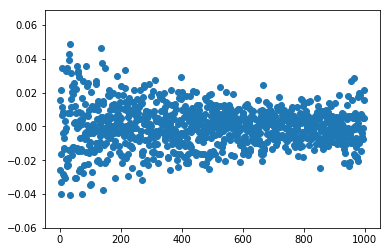

In [31]:
plt.scatter(x=data.index, y=data)
plt.show()
pass

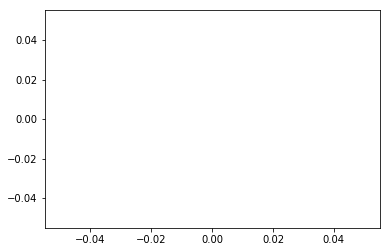

In [32]:
plt.plot(x=data.index, y=data)
plt.show()
pass